In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import mapping, Point, Polygon
import netCDF4 as nc
import xarray as xr

In [ ]:
# Load CFS file
cfsr_file = 'C:/Users/fitzpatrick/Desktop/pgbh06.gdas.197901.nc'
cfsr = xr.open_dataset(cfsr_file)

cfsr_lat = cfsr['latitude']
cfsr_lon = cfsr['longitude']
cfsr_mask = cfsr['LAND_surface'][0,:,:]

cfsr.close()

# Determine the resolution
lat_resolution = np.mean(np.diff(cfsr_lat))
lon_resolution = np.mean(np.diff(cfsr_lon))
print(lat_resolution, lon_resolution)


0.5 0.5


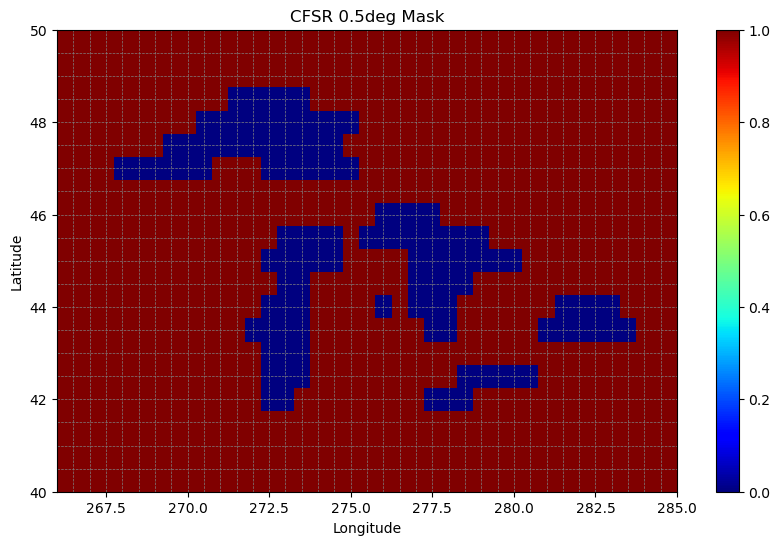

In [3]:
lat_min, lat_max = 40, 50
lon_min, lon_max = 266, 285

# Plotting the land variable
plt.figure(figsize=(10, 6))
mesh = plt.pcolormesh(cfsr_lon, cfsr_lat, cfsr_mask, shading='auto', cmap='jet')
# Customize the colorbar
cbar = plt.colorbar(mesh)

plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

plt.title('CFSR 0.5deg Mask')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

for lat1 in cfsr_lat:
    plt.axhline(y=lat1, color='gray', linewidth=0.5, linestyle='--')
for lon1 in cfsr_lon:
    plt.axvline(x=lon1, color='gray', linewidth=0.5, linestyle='--')

In [44]:
filename = 'C:/Users/fitzpatrick/Desktop/masks_2/lake_erie_basin_mask.nc'

# Open the NetCDF file using xarray
geo_mask = xr.open_dataset(filename)

# Define latitude and longitude bounds for the region of interest
lat_min, lat_max = 40, 52
lon_min, lon_max = -95, -70

# Subset the geo_mask to the desired region
geo_mask_subset = geo_mask.sel(longitude=slice(lon_min, lon_max),
                               latitude=slice(lat_min, lat_max))

# Shift longitude to 0-360 range for geo_mask
geo_mask_subset.coords['longitude'] = (geo_mask_subset.coords['longitude'] + 360)

mask = geo_mask_subset['water_fraction']
geo_lat = geo_mask_subset['latitude']
geo_lon = geo_mask_subset['longitude']

print(mask.shape)

(49, 101)


Text(0, 0.5, 'Latitude')

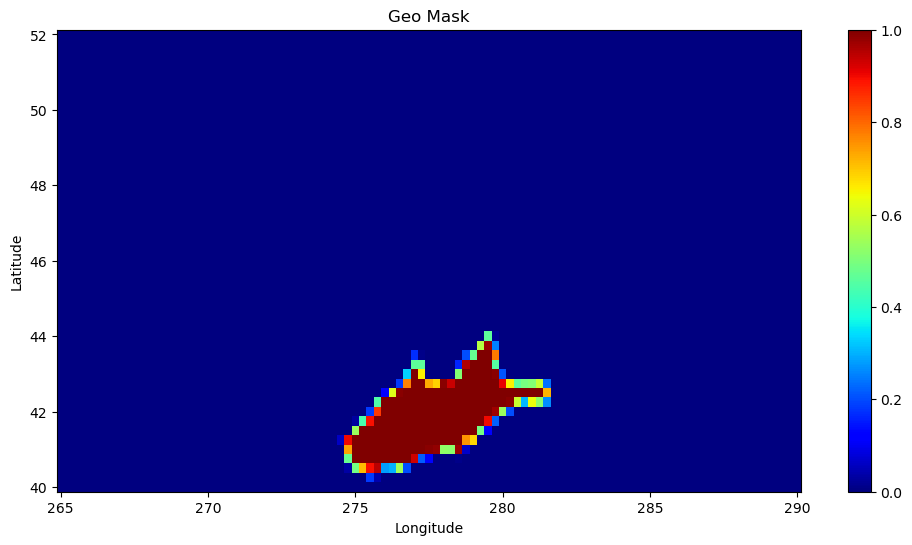

In [35]:
# Plotting the land variable
plt.figure(figsize=(12, 6))
mesh = plt.pcolormesh(geo_lon, geo_lat, mask, shading='auto', cmap='jet')
# Customize the colorbar
cbar = plt.colorbar(mesh)

plt.title('Geo Mask')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [56]:
lat_min, lat_max = 40, 52
lon_min, lon_max = -95+360, -70+360

# Subset the geo_mask to the desired region
cfsr_subset = cfsr.sel(longitude=slice(lon_min, lon_max),
                               latitude=slice(lat_min, lat_max))

cfsr_mask = cfsr_subset['LAND_surface'][0,:,:]
cfsr_lat = cfsr_subset['latitude']
cfsr_lon = cfsr_subset['longitude']

# Interpolate the basin mask to CFSR grid
cfsr_mask_interp = xr.DataArray(
    cfsr_mask,
    coords=[cfsr_lat, cfsr_lon],
    dims=['latitude', 'longitude']
    ).interp(longitude=geo_lon, latitude=geo_lat, method='linear')

print(cfsr_mask_interp.shape)

(49, 101)


In [57]:
# LAND = 1 and LAKE = 0. Here all of the 1s are turned to nans and 0s are then turned to 1s.
lake_mask_tmp = cfsr_mask_interp.where(cfsr_mask_interp != 1, np.nan)
lake_mask = lake_mask_tmp.where(lake_mask_tmp != 0, 1)

eri_lake_1 = lake_mask.where(lake_mask.latitude < 43, np.nan)
eri_lake_2 = eri_lake_1.where(lake_mask.latitude > 41.5, np.nan)
eri_lake_3 = eri_lake_2.where(lake_mask.longitude > 277, np.nan)
eri_lake = eri_lake_3.where(lake_mask.longitude < 281.5, np.nan)

In [98]:
ont_lake_1 = lake_mask.where(lake_mask.latitude < 45, np.nan)
ont_lake_2 = ont_lake_1.where(lake_mask.latitude > 43, np.nan)
ont_lake_3 = ont_lake_2.where(lake_mask.longitude > 280.5, np.nan)
ont_lake = ont_lake_3.where(lake_mask.longitude < 284.5, np.nan)

In [59]:
sup_lake_1 = lake_mask.where(lake_mask.latitude < 49, np.nan)
sup_lake_2 = sup_lake_1.where(lake_mask.latitude > 46.5, np.nan)
sup_lake_3 = sup_lake_2.where(lake_mask.longitude > 266, np.nan)
sup_lake = sup_lake_3.where(lake_mask.longitude < 276, np.nan)

In [60]:
mic_lake_1 = lake_mask.where(lake_mask.latitude < 46, np.nan)
mic_lake_2 = mic_lake_1.where(lake_mask.latitude > 41.5, np.nan)
mic_lake_3 = mic_lake_2.where(lake_mask.longitude > 271.5, np.nan)
mic_lake = mic_lake_3.where(lake_mask.longitude < 275, np.nan)

In [106]:
hur_lake_1 = lake_mask.where(lake_mask.latitude < 46.5, np.nan)
hur_lake_2 = hur_lake_1.where(lake_mask.latitude > 43, np.nan)
hur_lake_3 = hur_lake_2.where(lake_mask.longitude > 275, np.nan)
hur_lake = hur_lake_3.where(lake_mask.longitude < 280.5, np.nan)

In [107]:
mic_lake_tmp = mic_lake.fillna(0)
hur_lake_tmp = hur_lake.fillna(0)
mih_lake_tmp = mic_lake_tmp + hur_lake_tmp
mih_lake = mih_lake_tmp.where(mih_lake_tmp != 0, np.nan)

Text(0, 0.5, 'Latitude')

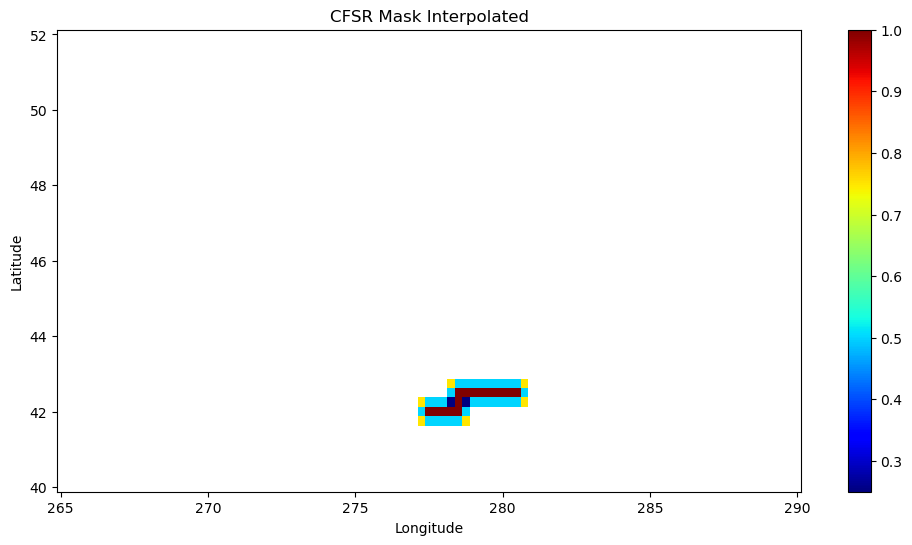

In [108]:
# Plotting the land variable
plt.figure(figsize=(12, 6))
mesh = plt.pcolormesh(eri_lake.longitude, eri_lake.latitude, eri_lake, shading='auto', cmap='jet')
# Customize the colorbar
cbar = plt.colorbar(mesh)

plt.title('CFSR Mask Interpolated')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [89]:
filename = 'C:/Users/fitzpatrick/Desktop/masks_2/lake_erie_basin_mask.nc'

# Open the NetCDF file using xarray
geo_mask = xr.open_dataset(filename)

# Define latitude and longitude bounds for the region of interest
lat_min, lat_max = 40, 52
lon_min, lon_max = -95, -70

# Subset the geo_mask to the desired region
geo_mask_subset = geo_mask.sel(longitude=slice(lon_min, lon_max),
                               latitude=slice(lat_min, lat_max))

# Shift longitude to 0-360 range for geo_mask
geo_mask_subset.coords['longitude'] = (geo_mask_subset.coords['longitude'] + 360)

# Extract the variables
eri_basin = geo_mask_subset['water_fraction']

eri_lake_tmp = eri_lake.fillna(0)
eri_land = eri_basin - eri_lake_tmp

eri_basin = eri_basin.where(eri_basin != 0, np.nan)

eri_land = eri_land.where(eri_land > 0, np.nan)
print(eri_land.shape)


(49, 101)


Text(0, 0.5, 'Latitude')

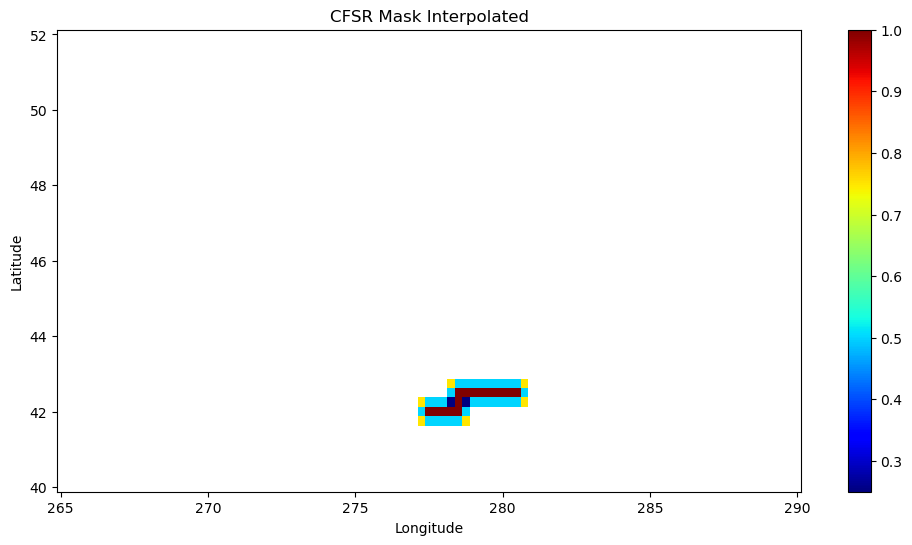

In [92]:
# Plotting the land variable
plt.figure(figsize=(12, 6))
mesh = plt.pcolormesh(eri_land.longitude, eri_land.latitude, eri_lake, shading='auto', cmap='jet')
# Customize the colorbar
cbar = plt.colorbar(mesh)

plt.title('CFSR Mask Interpolated')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [99]:
filename = 'C:/Users/fitzpatrick/Desktop/masks_2/lake_ontario_basin_mask.nc'

# Open the NetCDF file using xarray
geo_mask = xr.open_dataset(filename)

# Define latitude and longitude bounds for the region of interest
lat_min, lat_max = 40, 52
lon_min, lon_max = -95, -70

# Subset the geo_mask to the desired region
geo_mask_subset = geo_mask.sel(longitude=slice(lon_min, lon_max),
                               latitude=slice(lat_min, lat_max))

# Shift longitude to 0-360 range for geo_mask
geo_mask_subset.coords['longitude'] = (geo_mask_subset.coords['longitude'] + 360)

# Extract the variables
ont_basin = geo_mask_subset['water_fraction']

ont_lake_tmp = ont_lake.fillna(0)
ont_land = ont_basin - ont_lake_tmp

ont_basin = ont_basin.where(ont_basin != 0, np.nan)

ont_land = ont_land.where(ont_land > 0, np.nan)
print(ont_land.shape)

(49, 101)


In [111]:
filename = 'C:/Users/fitzpatrick/Desktop/masks_2/lake_superior_basin_mask.nc'

# Open the NetCDF file using xarray
geo_mask = xr.open_dataset(filename)

# Define latitude and longitude bounds for the region of interest
lat_min, lat_max = 40, 52
lon_min, lon_max = -95, -70

# Subset the geo_mask to the desired region
geo_mask_subset = geo_mask.sel(longitude=slice(lon_min, lon_max),
                               latitude=slice(lat_min, lat_max))

# Shift longitude to 0-360 range for geo_mask
geo_mask_subset.coords['longitude'] = (geo_mask_subset.coords['longitude'] + 360)

# Extract the variables
sup_basin = geo_mask_subset['water_fraction']

sup_lake_tmp = sup_lake.fillna(0)
sup_land = sup_basin - sup_lake_tmp

sup_basin = sup_basin.where(sup_basin != 0, np.nan)

sup_land = sup_land.where(sup_land > 0, np.nan)
print(sup_land.shape)

(49, 101)


In [115]:
filename = 'C:/Users/fitzpatrick/Desktop/masks_2/lake_michigan_basin_mask.nc'

# Open the NetCDF file using xarray
geo_mask = xr.open_dataset(filename)

# Define latitude and longitude bounds for the region of interest
lat_min, lat_max = 40, 52
lon_min, lon_max = -95, -70

# Subset the geo_mask to the desired region
geo_mask_subset = geo_mask.sel(longitude=slice(lon_min, lon_max),
                               latitude=slice(lat_min, lat_max))

# Shift longitude to 0-360 range for geo_mask
geo_mask_subset.coords['longitude'] = (geo_mask_subset.coords['longitude'] + 360)

# Extract the variables
mic_basin = geo_mask_subset['water_fraction']

In [116]:
filename = 'C:/Users/fitzpatrick/Desktop/masks_2/lake_huron_basin_mask.nc'

# Open the NetCDF file using xarray
geo_mask = xr.open_dataset(filename)

# Define latitude and longitude bounds for the region of interest
lat_min, lat_max = 40, 52
lon_min, lon_max = -95, -70

# Subset the geo_mask to the desired region
geo_mask_subset = geo_mask.sel(longitude=slice(lon_min, lon_max),
                               latitude=slice(lat_min, lat_max))

# Shift longitude to 0-360 range for geo_mask
geo_mask_subset.coords['longitude'] = (geo_mask_subset.coords['longitude'] + 360)

# Extract the variables
hur_basin = geo_mask_subset['water_fraction']

In [118]:
mih_basin = mic_basin + hur_basin

In [119]:
mih_lake_tmp = mih_lake.fillna(0)
mih_land = mih_basin - mih_lake_tmp

mih_basin = mih_basin.where(mih_basin != 0, np.nan)

mih_land = mih_land.where(mih_land > 0, np.nan)
print(mih_land.shape)

(49, 101)


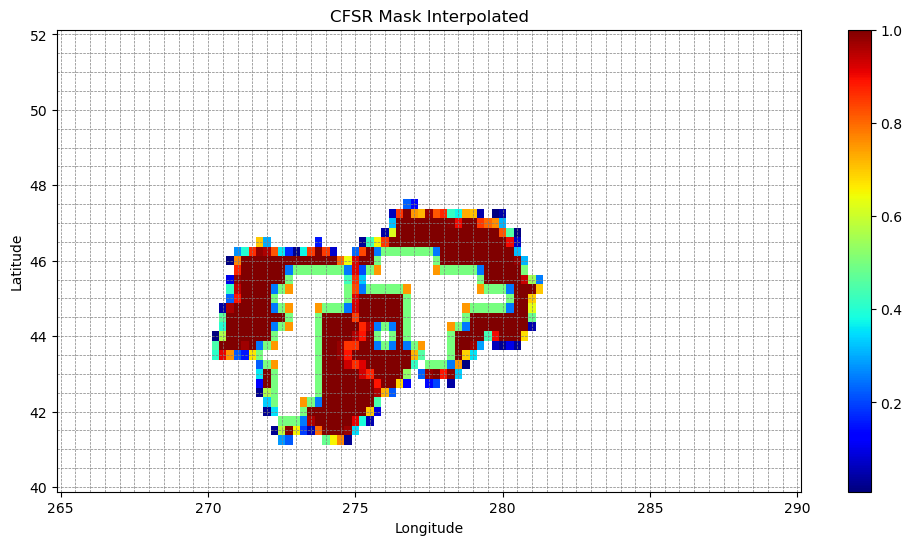

In [120]:
# Plotting the land variable
plt.figure(figsize=(12, 6))
mesh = plt.pcolormesh(ont_lake.longitude, ont_lake.latitude, mih_land, shading='auto', cmap='jet')
# Customize the colorbar
cbar = plt.colorbar(mesh)

plt.title('CFSR Mask Interpolated')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

for lat1 in cfsr_lat:
    plt.axhline(y=lat1, color='gray', linewidth=0.5, linestyle='--')
for lon1 in cfsr_lon:
    plt.axvline(x=lon1, color='gray', linewidth=0.5, linestyle='--')

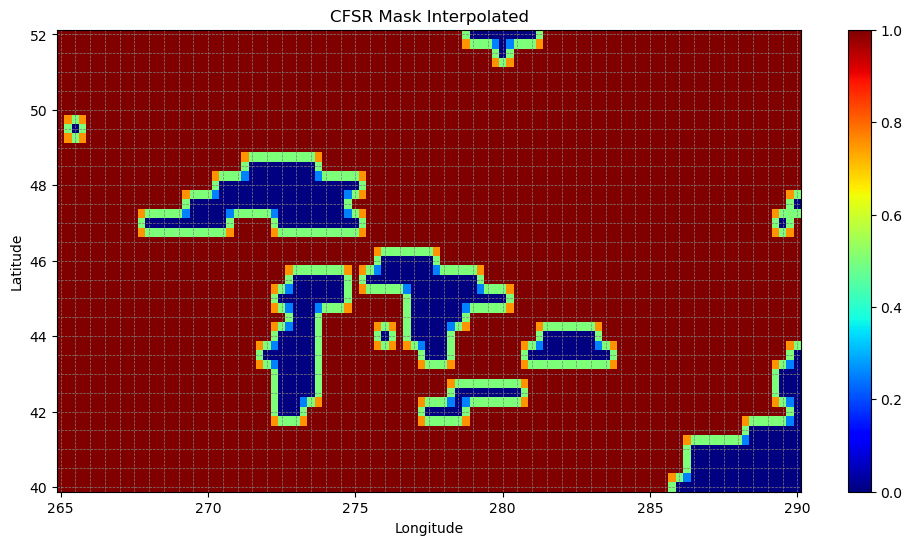

In [100]:
# Plotting the land variable
plt.figure(figsize=(12, 6))
mesh = plt.pcolormesh(cfsr_mask_interp.longitude, cfsr_mask_interp.latitude, cfsr_mask_interp, shading='auto', cmap='jet')
# Customize the colorbar
cbar = plt.colorbar(mesh)

plt.title('CFSR Mask Interpolated')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

for lat1 in cfsr_lat:
    plt.axhline(y=lat1, color='gray', linewidth=0.5, linestyle='--')
for lon1 in cfsr_lon:
    plt.axvline(x=lon1, color='gray', linewidth=0.5, linestyle='--')

In [121]:
# Create a new xarray Dataset to hold all variables
new_ds = xr.Dataset({
    'eri_basin': eri_basin,
    'eri_lake': eri_lake,
    'eri_land': eri_land,
    'ont_basin': ont_basin,
    'ont_lake': ont_lake,
    'ont_land': ont_land,
    'mih_basin': mih_basin,
    'mih_lake': mih_lake,
    'mih_land': mih_land,
    'sup_basin': sup_basin,
    'sup_lake': sup_lake,
    'sup_land': sup_land
}, coords={
    'latitude': cfsr_lat,
    'longitude': cfsr_lon
})


# Optionally, you can add additional attributes or metadata to the dataset:
new_ds.attrs['description'] = 'This dataset was created using geographical masks for each of the Great Lakes basins and the land/lake mask taken from CFSR. It is subset to the Great Lakes and on the 0.25 deg grid'
new_ds.attrs['created_on'] = '2025-01-15'

# Save the new dataset to a NetCDF file
output_file = 'C:/Users/fitzpatrick/Desktop/Data/created_masks/mask_cfsr_0.25_subset.nc'
new_ds.to_netcdf(output_file)